In [1]:
from matplotlib import pyplot as plt
import numpy as np
from math import sqrt, exp

__VERSION__ = "1.1"
__DATE__ = "Friday 13/Jan/2023"
IMGPATH = "" # "../src/_img"
print(f"Notebook version v{__VERSION__} ({__DATE__}); IMGPATH='{IMGPATH}'")

Notebook version v1.1 (Friday 13/Jan/2023); IMGPATH=''


# AMM Order Book Maths

_companion sheet to the technical note published January 2023_

- [technical note on Arxiv [to come]][arxiv]
- [blog post on Carbon Medium [to come]][medium]

[arxiv]:https://arxiv.org/search/q-fin?searchtype=author&query=Loesch%2C+S
[medium]:https://medium.com/carbondefi


## Cumulative order book by marginal price

#### Chart `ammob_cumulmargpeth`

x=10ETH, y=10000USDC p0=1000.0USDC per ETH


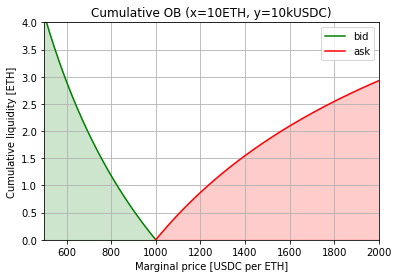

In [2]:
k   = 100000
x0  = 10
y0  = k/x0
p0  = y0/x0
print(f"x={x0}ETH, y={y0:.0f}USDC p0={k/x0**2}USDC per ETH")

dx_rask = np.linspace(-5, 0, 500)
dx_rbid = np.linspace( 0, 5, 500)

p_rbid = [k/(x0+dx)**2 for dx in dx_rbid]
p_rask = [k/(x0+dx)**2 for dx in dx_rask]
plt.plot(p_rbid, dx_rbid, color="green", label="bid")
plt.fill_between(p_rbid, dx_rbid, color="green", alpha=0.2)
plt.plot(p_rask, -dx_rask, color="red", label="ask")
plt.fill_between(p_rask, -dx_rask, color="red", alpha=0.2)
plt.title(f"Cumulative OB (x={x0}ETH, y={y0/1000:.0f}kUSDC)")
plt.xlabel("Marginal price [USDC per ETH]")
plt.ylabel("Cumulative liquidity [ETH]")
plt.xlim(500,2000)
plt.ylim(0,4)
plt.legend()
plt.grid()
if IMGPATH: plt.savefig(f"{IMGPATH}/ammob_cumulmargpeth.png")

#### Chart `ammob_cumulmargpusdc`

x=10ETH, y=10000USDC p0=1000.0USDC per ETH


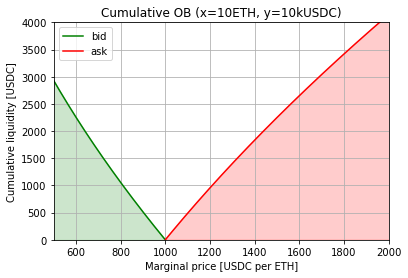

In [3]:
print(f"x={x0}ETH, y={y0:.0f}USDC p0={k/x0**2}USDC per ETH")
dx_rask = np.linspace(-5, 0, 500)
dx_rbid = np.linspace( 0, 5, 500)

dy_rask = np.array([(k/(x0+dx))-y0 for dx in dx_rask])
dy_rbid = np.array([(k/(x0+dx))-y0 for dx in dx_rbid])

plt.plot(p_rbid, -dy_rbid, color="green", label="bid")
plt.fill_between(p_rbid, -dy_rbid, color="green", alpha=0.2)
plt.plot(p_rask,  dy_rask, color="red", label="ask")
plt.fill_between(p_rask, dy_rask, color="red", alpha=0.2)
plt.title(f"Cumulative OB (x={x0}ETH, y={y0/1000:.0f}kUSDC)")
plt.xlabel("Marginal price [USDC per ETH]")
plt.ylabel("Cumulative liquidity [USDC]")
plt.xlim(500,2000)
plt.ylim(0,4000)
plt.legend()
plt.grid()
if IMGPATH: plt.savefig(f"{IMGPATH}/ammob_cumulmargpusdc.png")

#### Chart `ammob_cumulmargpusdcr`

x=10ETH, y=10000USDC p0=1000.0USDC per ETH


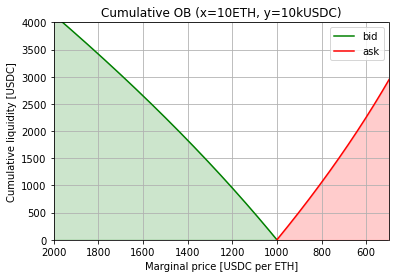

In [4]:
print(f"x={x0}ETH, y={y0:.0f}USDC p0={k/x0**2}USDC per ETH")
dx_rask = np.linspace(-5, 0, 500)
dx_rbid = np.linspace( 0, 5, 500)

dy_rask = np.array([(k/(x0+dx))-y0 for dx in dx_rask])
dy_rbid = np.array([(k/(x0+dx))-y0 for dx in dx_rbid])

_, plt1 = plt.subplots(1,1)
plt.plot(p_rask,  dy_rask, color="green", label="bid")
plt.fill_between(p_rask, dy_rask, color="green", alpha=0.2)
plt.plot(p_rbid, -dy_rbid, color="red", label="ask")
plt.fill_between(p_rbid, -dy_rbid, color="red", alpha=0.2)
plt.title(f"Cumulative OB (x={x0}ETH, y={y0/1000:.0f}kUSDC)")
plt.xlabel("Marginal price [USDC per ETH]")
plt.ylabel("Cumulative liquidity [USDC]")
plt.legend()
plt.xlim(500,2000)
plt.ylim(0,4000)
plt1.invert_xaxis()
plt.grid()
if IMGPATH: plt.savefig(f"{IMGPATH}/ammob_cumulmargpusdcr.png")

## Cumulative order book by effective price

In [5]:
p_r1 = np.linspace(500,2000, 1000)
p_r1bid = np.linspace(500,1000, 500)
p_r1ask = np.linspace(1000,2000, 500)

dx_r1 = np.array([abs(y0/p-x0) for p in p_r1])
dx_r1bid = np.array([abs(y0/p-x0) for p in p_r1bid])
dx_r1ask = np.array([abs(y0/p-x0) for p in p_r1ask])

dy_r1 = np.array([abs(y0-p*x0) for p in p_r1])
dy_r1bid = np.array([abs(y0-p*x0) for p in p_r1bid])
dy_r1ask = np.array([abs(y0-p*x0) for p in p_r1ask])

#### Chart `ammob_cumuleth`

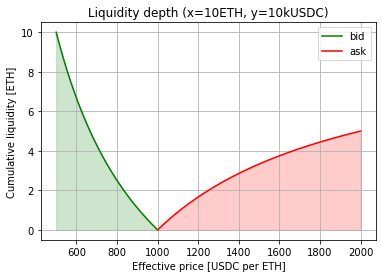

In [6]:
plt.plot(p_r1bid,  dx_r1bid, color="green", label="bid")
plt.fill_between(p_r1bid, dx_r1bid, color="green", alpha=0.2)
plt.plot(p_r1ask, dx_r1ask, color="red", label="ask")
plt.fill_between(p_r1ask, dx_r1ask, color="red", alpha=0.2)
plt.title(f"Liquidity depth (x={x0}ETH, y={y0/1000:.0f}kUSDC)")
plt.xlabel("Effective price [USDC per ETH]")
plt.ylabel("Cumulative liquidity [ETH]")
plt.legend()
plt.grid()
if IMGPATH: plt.savefig(f"{IMGPATH}/ammob_cumuleth.png")

#### Chart `ammob_cumulusdcr`

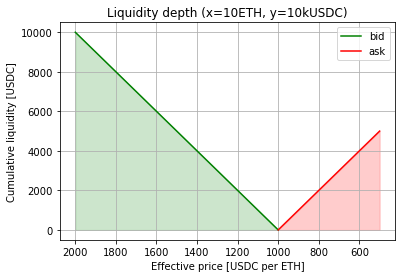

In [7]:
_, plt1 = plt.subplots(1,1)
plt.plot(p_r1ask,  dy_r1ask, color="green", label="bid")
plt.fill_between(p_r1ask, dy_r1ask, color="green", alpha=0.2)
plt.plot(p_r1bid, dy_r1bid, color="red", label="ask")
plt.fill_between(p_r1bid, dy_r1bid, color="red", alpha=0.2)
plt.title(f"Liquidity depth (x={x0}ETH, y={y0/1000:.0f}kUSDC)")
plt.xlabel("Effective price [USDC per ETH]")
plt.ylabel("Cumulative liquidity [USDC]")
plt.legend()
plt1.invert_xaxis()
plt.grid()
if IMGPATH: plt.savefig(f"{IMGPATH}/ammob_cumulusdcr.png")

## Marginal order book


#### Chart `ammob_margeth`

p = 444 ... 4000


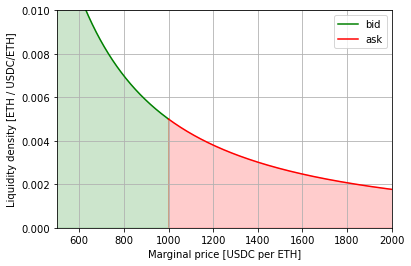

In [8]:
print(f"p = {min(p_rbid):.0f} ... {max(p_rask):.0f}")
p_rbid = np.linspace(min(p_rbid), p0, 500)
p_rask = np.linspace(p0, max(p_rask), 500)

plt.plot(p_rbid, [sqrt(k)/(2*(sqrt(p**3))) for p in p_rbid], color="green", label="bid")
plt.fill_between(p_rbid, [sqrt(k)/(2*(sqrt(p**3))) for p in p_rbid], color="green", alpha=0.2)
plt.plot(p_rask, [sqrt(k)/(2*(sqrt(p**3))) for p in p_rask], color="red", label="ask")
plt.fill_between(p_rask, [sqrt(k)/(2*(sqrt(p**3))) for p in p_rask], color="red", alpha=0.2)
plt.xlabel("Marginal price [USDC per ETH]")
plt.ylabel("Liquidity density [ETH / USDC/ETH]")
plt.legend()
plt.xlim(500,2000)
plt.ylim(0,0.010)
plt.grid()
if IMGPATH: plt.savefig(f"{IMGPATH}/ammob_margeth.png")

#### Chart `ammob_margusdc`

p = 444 ... 4000


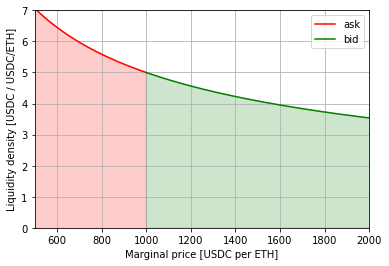

In [9]:
print(f"p = {min(p_rbid):.0f} ... {max(p_rask):.0f}")
p_rbid = np.linspace(min(p_rbid), p0, 500)
p_rask = np.linspace(p0, max(p_rask), 500)

plt.plot(p_rbid, [sqrt(k)/(2*(sqrt(p))) for p in p_rbid], color="red", label="ask")
plt.fill_between(p_rbid, [sqrt(k)/(2*(sqrt(p))) for p in p_rbid], color="red", alpha=0.2)
plt.plot(p_rask, [sqrt(k)/(2*(sqrt(p))) for p in p_rask], color="green", label="bid")
plt.fill_between(p_rask, [sqrt(k)/(2*(sqrt(p))) for p in p_rask], color="green", alpha=0.2)
plt.xlabel("Marginal price [USDC per ETH]")
plt.ylabel("Liquidity density [USDC / USDC/ETH]")
plt.xlim(500,2000)
plt.ylim(0,7)
plt.legend()
plt.grid()
if IMGPATH: plt.savefig(f"{IMGPATH}/ammob_margusdc.png")

#### Chart `ammob_margusdcr`

p = 444 ... 4000


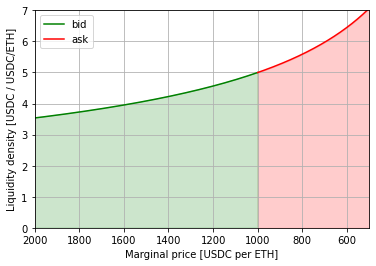

In [10]:
print(f"p = {min(p_rbid):.0f} ... {max(p_rask):.0f}")
p_rbid = np.linspace(min(p_rbid), p0, 500)
p_rask = np.linspace(p0, max(p_rask), 500)

_, plt1 = plt.subplots(1,1)
plt.plot(p_rask, [sqrt(k)/(2*(sqrt(p))) for p in p_rask], color="green", label="bid")
plt.fill_between(p_rask, [sqrt(k)/(2*(sqrt(p))) for p in p_rask], color="green", alpha=0.2)
plt.plot(p_rbid, [sqrt(k)/(2*(sqrt(p))) for p in p_rbid], color="red", label="ask")
plt.fill_between(p_rbid, [sqrt(k)/(2*(sqrt(p))) for p in p_rbid], color="red", alpha=0.2)
plt.xlabel("Marginal price [USDC per ETH]")
plt.ylabel("Liquidity density [USDC / USDC/ETH]")
plt.xlim(500,2000)
plt.ylim(0,7)
plt.legend()
plt1.invert_xaxis()
plt.grid()
if IMGPATH: plt.savefig(f"{IMGPATH}/ammob_margusdcr.png")

## Bucketing the marginal order book

In [11]:
p_r = np.linspace(500,1500, 21)
p1_r = p_r[:len(p_r)//2+1]
p2_r = p_r[len(p_r)//2:]
dp = p_r[1]-p_r[0]

dx_r = np.array([x0*abs(sqrt(p0/p)-1) for p in p_r])
dx1_r = np.array([x0*abs(sqrt(p0/p)-1) for p in p1_r])
dx2_r = np.array([x0*abs(sqrt(p0/p)-1) for p in p2_r])

#p1_r, p2_r, dp, dx1_r, dx2_r

#### chart `ammob_buckliq`

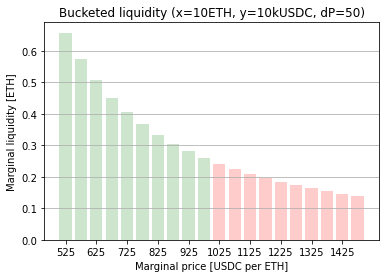

In [12]:
plt.bar([i for i in range(len(dx1_r)-1)], -np.diff(dx1_r), color="green", alpha=0.2)
plt.bar([i+len(dx1_r)-1 for i in range(len(dx1_r)-1)], np.diff(dx2_r), color="red", alpha=0.2)
tic_i = [i for i in range(2*len(dx1_r)-2)]
tic_x = [f"{0.5*(p1+p2):.0f}" for p1,p2, i in zip(p_r, p_r[1:], range(100))]
tic_skip = 2
plt.xticks(tic_i[::tic_skip], tic_x[::tic_skip])
plt.title(f"Bucketed liquidity (x={x0}ETH, y={y0/1000:.0f}kUSDC, dP={dp:.0f})")
plt.xlabel("Marginal price [USDC per ETH]")
plt.ylabel("Marginal liquidity [ETH]")
plt.grid(axis="y")
if IMGPATH: plt.savefig(f"{IMGPATH}/ammob_buckliq.png")